In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r'E:\netData\APS\2010\Paper\aps-RDI-2010.csv.zip')

In [4]:
df['Field'] = df['Field'].apply(lambda x:int(x//10))

In [5]:
def ref_classify(x):
    if x <= 10:
        return  '1-10'
    elif x <= 20:
        return  '11-20'
    elif x <= 30:
        return  '21-30'
    else:
        return  '>30'
df['binref'] = df['outdegree'].apply(ref_classify)

In [6]:
def ref_classify2(x):
    if x >= 1980 and x<1990:
        return  '1980-1989'
    elif x >= 1990 and x<2000:
        return  '1990-1999'
    elif x >= 2000 and x<2010:
        return  '2000-2009'
    else:
        return  '<1980'
df['binyear'] = df['year'].apply(ref_classify2)

# issue 1, 2 References

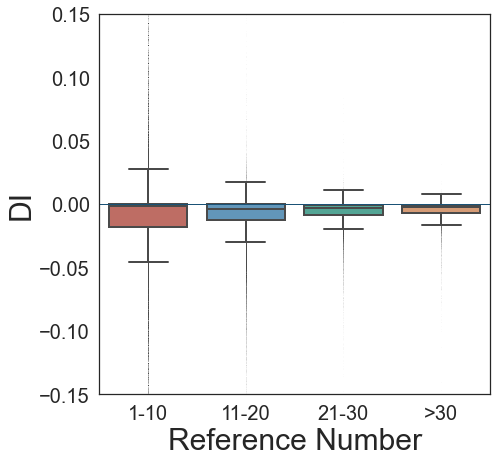

In [9]:
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x="binref", y="CD",order=['1-10','11-20','21-30','>30'],palette = ['#CD6155','#5499C7','#45B39D','#E59866'],
            data=df,meanline=True,linewidth = 2,fliersize=0.005)
sns.set_theme(style="white", palette=None)
plt.axhline(y = 0 , c = '#1A5276', linewidth = 1)
plt.ylim(-0.15,0.15)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Reference Number',fontsize = 30)
plt.ylabel('DI',fontsize = 30)
plt.show()

In [11]:
lst = [df[df['binref']==i]['CD'].values for i in df['binref'].unique()]
scipy.stats.f_oneway(lst[0],lst[1],lst[2],lst[3])

F_onewayResult(statistic=95.21437591261135, pvalue=1.3569730739081012e-61)

In [40]:
formula = 'outdegree ~  CD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df).fit()
params = model.params.values[1].round(3)
pvalues = model.pvalues.values[1].round(3)
print(params , pvalues)

-4.903 0.0


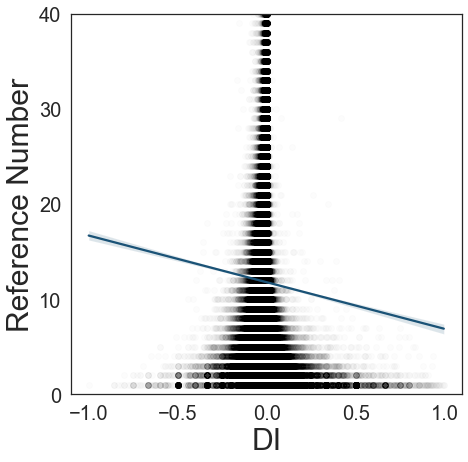

In [14]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['CD'], df['outdegree'], c = 'black' , alpha = 0.01)
sns.regplot(data = df, y='outdegree' , x='CD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#1A5276',scatter = False)
plt.ylim(0,40)
plt.yticks([0,10,20,30,40],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('Reference Number',fontsize = 30)
plt.show()

# issue 34 Consistency in year and fields

In [7]:
label = range(10)
dflst = [df[df['Field']==i] for i in label]

In [8]:
scipy.stats.f_oneway(dflst[0]['CD'].values,dflst[1]['CD'].values,dflst[2]['CD'].values,dflst[3]['CD'].values,dflst[4]['CD'].values,dflst[5]['CD'].values,dflst[6]['CD'].values,dflst[7]['CD'].values,dflst[8]['CD'].values,dflst[9]['CD'].values,)

F_onewayResult(statistic=63.0416941388505, pvalue=2.6821175597280625e-116)

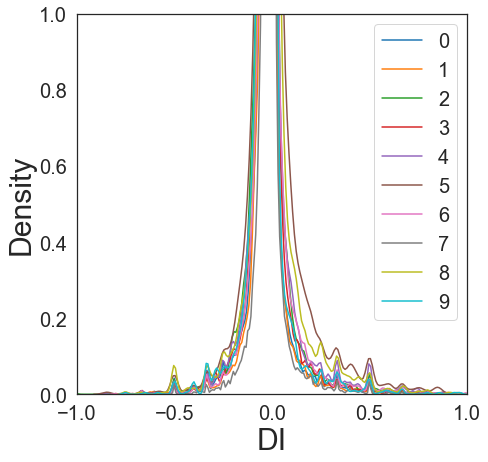

In [56]:
f, ax = plt.subplots(figsize=(7, 7))
for i in label:
    sns.kdeplot(data=dflst[i], x="CD",label = label[i])
plt.ylim(0,1)
plt.xlim(-1,1)
plt.yticks(fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('Density',fontsize = 30)
plt.legend(fontsize = 20)
plt.show()

In [9]:
yearlabel = ['1980-1989','1990-1999','2000-2009']
dflst = [df[df['binyear']==i] for i in yearlabel]

In [11]:
scipy.stats.f_oneway(dflst[0]['CD'].values,dflst[1]['CD'].values,dflst[2]['CD'].values,)

F_onewayResult(statistic=111.00320863424986, pvalue=6.439427391550522e-49)

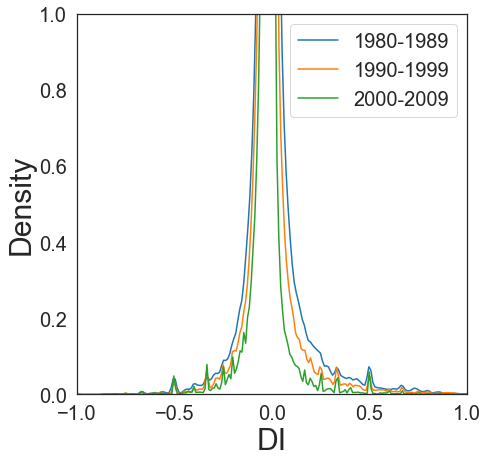

In [53]:
f, ax = plt.subplots(figsize=(7, 7))
for i in range(3):
    sns.kdeplot(data=dflst[i], x="CD",label = yearlabel[i])
plt.ylim(0,1)
plt.xlim(-1,1)
plt.yticks(fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('Density',fontsize = 30)
plt.legend(fontsize = 20)
plt.show()

# issue 5 Consistency citation count/ PageRank/ h

In [41]:
topv = np.percentile(df['indegree'],99)
formula = 'indegree~ CD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['indegree']<=topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               indegree   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1527.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:55:31   Log-Likelihood:            -1.2068e+06
No. Observations:              312795   AIC:                         2.414e+06
Df Residuals:                  312793   BIC:                         2.414e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9016      0.021    382.768      0.0

In [43]:
topv = np.percentile(df['indegree'],99)
formula = 'indegree ~ CD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['indegree']>topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               indegree   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     92.15
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.60e-21
Time:                        17:56:15   Log-Likelihood:                -20010.
No. Observations:                3109   AIC:                         4.002e+04
Df Residuals:                    3107   BIC:                         4.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.4177      2.713     59.867      0.0

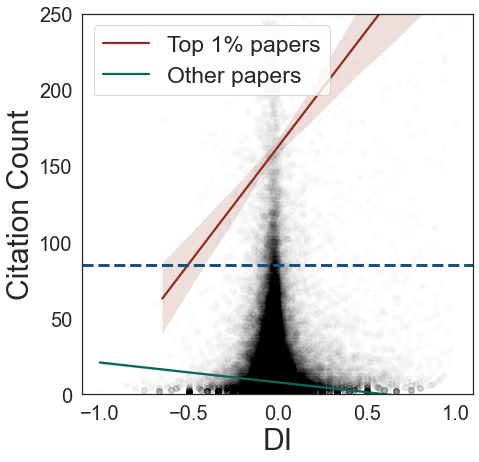

In [27]:
topv = np.percentile(df['indegree'],99)

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['CD'], df['indegree'], c = 'black' , alpha = 0.01)
sns.regplot(data = df[df['indegree']>topv] , y='indegree' , x='CD', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False , label = 'Top 1% papers')
sns.regplot(data = df[df['indegree']<=topv] , y='indegree' , x='CD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#0E6655',scatter = False , label='Other papers')
plt.axhline(y = topv , c = '#1A5276', linestyle = '--', linewidth = 3)
# ax.set_yscale("log")
plt.ylim(0,250)
plt.yticks([0,50,100,150,200,250],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('Citation Count',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

In [44]:
topv = np.percentile(df['h'],99)
formula = 'h~ CD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['h']<topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1568.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:57:11   Log-Likelihood:            -8.0446e+05
No. Observations:              312601   AIC:                         1.609e+06
Df Residuals:                  312599   BIC:                         1.609e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8159      0.006    492.871      0.0

In [45]:
topv = np.percentile(df['h'],99)
formula = 'h ~  CD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['h']>topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     45.88
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.52e-11
Time:                        17:57:35   Log-Likelihood:                -8994.9
No. Observations:                2796   AIC:                         1.799e+04
Df Residuals:                    2794   BIC:                         1.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0637      0.114    210.458      0.0

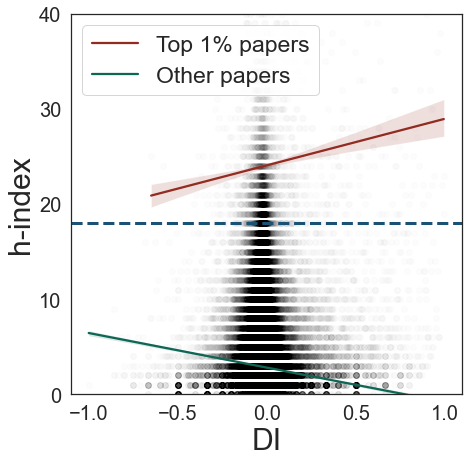

In [28]:
topv = np.percentile(df['h'],99)

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['CD'], df['h'], c = 'black' , alpha = 0.01)
sns.regplot(data = df[df['h']>topv] , y='h' , x='CD', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False, label = 'Top 1% papers')
sns.regplot(data = df[df['h']<topv] , y='h' , x='CD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#0E6655',scatter = False, label='Other papers')
plt.axhline(y = topv , c = '#1A5276', linestyle = '--', linewidth = 3)
plt.ylim(0,40)
plt.yticks([0,10,20,30,40],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('h-index',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

In [46]:
topv = np.percentile(df['pagerank'],99)
formula = 'pagerank~ CD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['pagerank']<topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pagerank   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.952
Date:                Thu, 27 Jul 2023   Prob (F-statistic):            0.00480
Time:                        17:57:52   Log-Likelihood:             3.8837e+06
No. Observations:              312822   AIC:                        -7.767e+06
Df Residuals:                  312820   BIC:                        -7.767e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.311e-07   1.77e-09    526.291      0.0

In [47]:
topv = np.percentile(df['pagerank'],99)
formula = 'pagerank ~  CD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['pagerank']>topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pagerank   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.64e-31
Time:                        17:57:56   Log-Likelihood:                 29432.
No. Observations:                3160   AIC:                        -5.886e+04
Df Residuals:                    3158   BIC:                        -5.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.971e-05   3.97e-07     49.647      0.0

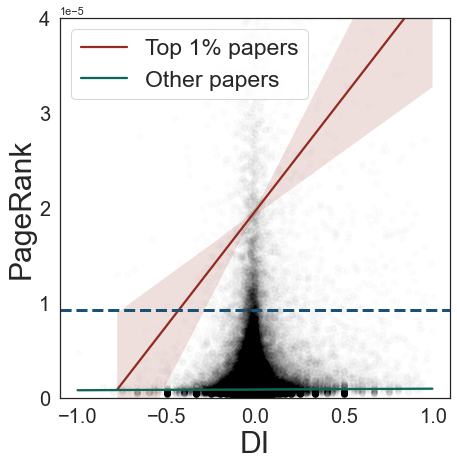

In [33]:
topv = np.percentile(df['pagerank'],99)

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['CD'], df['pagerank'], c = 'black' , alpha = 0.01)
sns.regplot(data = df[df['pagerank']>topv] , y='pagerank' , x='CD', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False, label = 'Top 1% papers')
sns.regplot(data = df[df['pagerank']<topv] , y='pagerank' , x='CD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#0E6655',scatter = False, label='Other papers')
plt.axhline(y = topv , c = '#1A5276', linestyle = '--', linewidth = 3)
plt.ylim(0,0.00004)
plt.yticks([0,0.00001,0.00002,0.00003,0.00004],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('PageRank',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

# issue 6 Convergent validity milestones

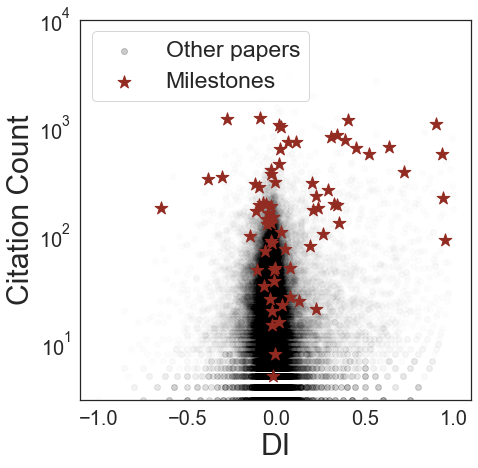

In [34]:
Prizedf = df[df['if Prize']==1]

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['CD'], df['indegree'], c = 'black' , alpha = 0.01)
plt.scatter(df['CD'].values[100], df['indegree'].values[100], c = 'black' , alpha = 0.2,label = 'Other papers')
plt.scatter(Prizedf['CD'], Prizedf['indegree'], c = '#922B21' ,marker = '*',s=180, alpha = 1,label = 'Milestones')
ax.set_yscale("log")
plt.ylim(3,10000)
plt.yticks([10e0,10e1,10e2,10e3],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('Citation Count',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

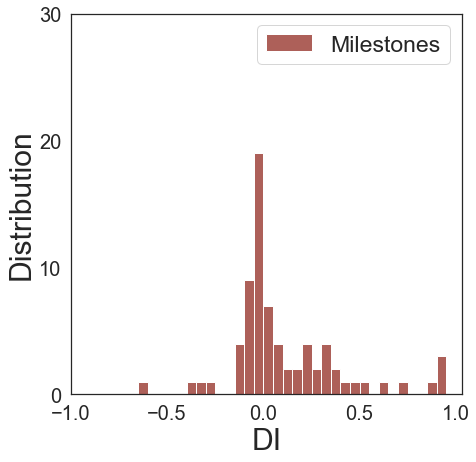

In [36]:
Prizedf = df[df['if Prize']==1]
f, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data = Prizedf, x='CD',binwidth=.05,fill = True,color ='#922B21',label='Milestones' )
plt.ylim(0,30)
plt.yticks([0,10,20,30],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('Distribution',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

# issue 7 Citation Database

In [38]:
dfm = pd.read_csv(r'E:\netData\APS\2010\Paper\aps-papers-mag-2010.zip')
for i in ['Disruption','Atyp_Median_Z','Reference_Count','Citation_Count']:
    df[i] = dfm[i]

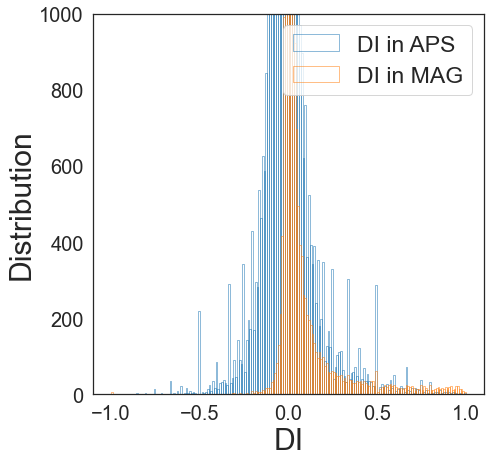

In [39]:
f, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data = df, x='CD',binwidth=.01,fill = False,label='DI in APS')
sns.histplot(data = df, x='Disruption',binwidth=.01,fill = False, label='DI in MAG')
plt.ylim(0,1000)
plt.yticks([0,200,400,600,800,1000],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('DI',fontsize = 30)
plt.ylabel('Distribution',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()